In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import datasets


In [3]:
# Loading the Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Scale pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# make labels one-hot representation so we can use it for the CNN
train_labels_one_hot = tf.one_hot(train_labels, 10)[:, 0, :]
test_labels_one_hot = tf.one_hot(test_labels, 10)[:, 0, :]

# Categories that the dataset seperates the data by:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [4]:
# Determining the original size of the test and train data
print(f"Train Images: {train_images.shape}")
print(f"Test Images: {test_images.shape}")
print(f"Train Label: {train_labels.shape}")
print(f"Test Label: {test_labels.shape}")

Train Images: (50000, 32, 32, 3)
Test Images: (10000, 32, 32, 3)
Train Label: (50000, 1)
Test Label: (10000, 1)


In [ ]:
# Creating the CNN
cnn_model = Sequential([
    # Convolutions
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Printing a summary of the dataset
cnn_model.summary()

#adding optimizer, loss, and metixs
cnn_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,818 (2.44 MB)

 Trainable params: 639,050 (2.44 MB)

 Non-trainable params: 768 (3.00 KB)

Text(0, 0.5, 'Accuracy')

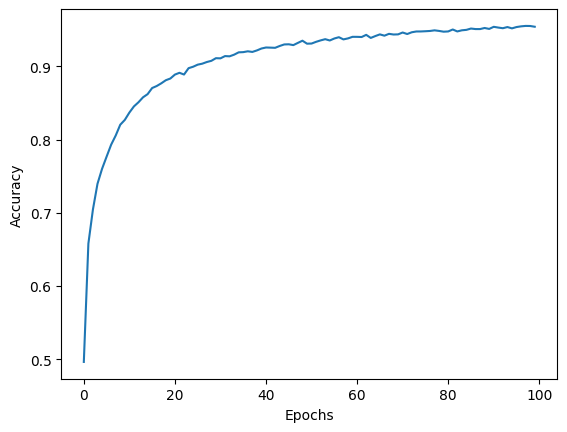

In [61]:
#training the cnn
history = cnn_model.fit(train_images, train_labels_one_hot, batch_size=64, epochs=100)

#Plotting the graph of the CNN's accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [29]:
cnn_model.save('cifar_model.keras')

cnn_preds = cnn_model.predict(test_images)
cnn_y_pred = np.argmax(cnn_preds, axis=-1)

cnn_y_pred = cnn_y_pred.reshape(-1, 1)

cnn_test_acc = np.mean(cnn_y_pred == test_labels)
print(f"Accuracy: {cnn_test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Accuracy: 0.8461


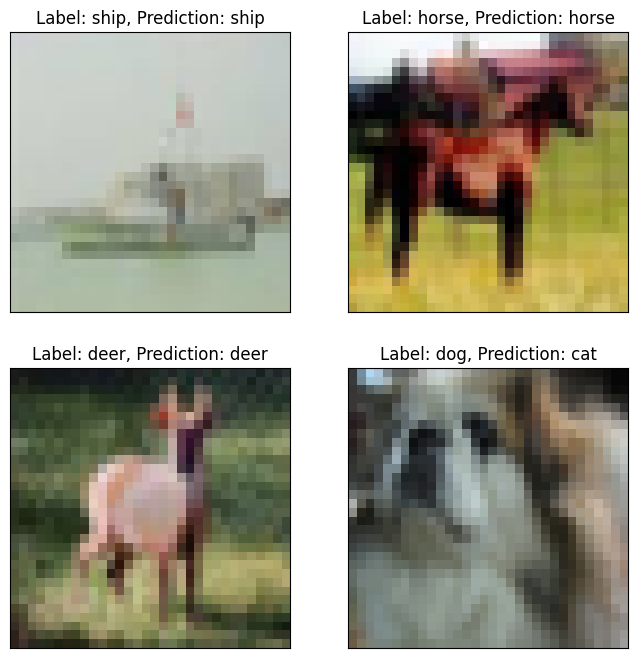

In [60]:
plt.figure(figsize=(8, 8))
n = 2
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, test_images.shape[0])
    plt.imshow(test_images[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {class_names[test_labels[random_idx].item()]}, Prediction: {class_names[cnn_y_pred[random_idx].item()]}")

plt.show()